In [2]:
# Installer les bibliothèques nécessaires
# !pip install datasets

from datasets import load_dataset
import re

# Télécharger le jeu de données CNN/Daily Mail
dataset = load_dataset("abisee/cnn_dailymail", "3.0.0")

# Vérifier les tailles des sous-ensembles
train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']

print(f"Train size: {len(train_data)}, Validation size: {len(validation_data)}, Test size: {len(test_data)}")


Train size: 287113, Validation size: 13368, Test size: 11490


In [4]:
# Fonction de nettoyage des textes
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Supprimer les espaces multiples
    text = re.sub(r'[^a-zA-Z0-9. ]', '', text)  # Supprimer les caractères spéciaux
    return text.strip()

# Fonction pour prétraiter le jeu de données
def preprocess_dataset(data):
    texts, summaries = [], []
    for item in data:
        texts.append(clean_text(item['article']))
        summaries.append(clean_text(item['highlights']))
    return texts, summaries

# Prétraiter les ensembles de données
train_texts, train_summaries = preprocess_dataset(train_data)
validation_texts, validation_summaries = preprocess_dataset(validation_data)
test_texts, test_summaries = preprocess_dataset(test_data)

In [24]:
from IPython.display import display, Markdown

# Exemple d'affichage pour un article et son résumé prétraités
example_article = train_texts[0][:1000]  # Limiter à 1000 caractères pour l'affichage
example_summary = train_summaries[0][:500]  # Limiter à 500 caractères pour l'affichage

display(Markdown(f"### Exemple d'Article Prétraité :\n\n{example_article} ..."))
display(Markdown(f"### Exemple de Résumé Prétraité :\n\n{example_summary}"))


### Exemple d'Article Prétraité :

LONDON England Reuters  Harry Potter star Daniel Radcliffe gains access to a reported 20 million 41.1 million fortune as he turns 18 on Monday but he insists the money wont cast a spell on him. Daniel Radcliffe as Harry Potter in Harry Potter and the Order of the Phoenix To the disappointment of gossip columnists around the world the young actor says he has no plans to fritter his cash away on fast cars drink and celebrity parties. I dont plan to be one of those people who as soon as they turn 18 suddenly buy themselves a massive sports car collection or something similar he told an Australian interviewer earlier this month. I dont think Ill be particularly extravagant. The things I like buying are things that cost about 10 pounds  books and CDs and DVDs. At 18 Radcliffe will be able to gamble in a casino buy a drink in a pub or see the horror film Hostel Part II currently six places below his number one movie on the UK box office chart. Details of how hell mark his landmark birthday a ...

### Exemple de Résumé Prétraité :

Harry Potter star Daniel Radcliffe gets 20M fortune as he turns 18 Monday . Young actor says he has no plans to fritter his cash away . Radcliffes earnings from first five Potter films have been held in trust fund .

In [32]:
# Installer Hugging Face Transformers si nécessaire
# !pip install transformers 

# importation du module transformers
from transformers import pipeline

# Charger le pipeline de résumé extractif
extractive_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Fonction pour générer et afficher les résumés dans le notebook
def extractive_summary_display(texts, max_length=130, min_length=30, num_samples=5):
    summaries = []
    for i, text in enumerate(texts[:num_samples]):  # Limiter à quelques exemples pour tester
        summary = extractive_summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
        summaries.append(summary[0]['summary_text'])
        # Afficher chaque article et son résumé
        display(Markdown(f"### Article {i + 1} :\n\n{text[:1000]}..."))  # Limite à 500 caractères pour l'article
        display(Markdown(f"### Résumé Extractif {i + 1} :\n\n{summaries[-1]}"))
    return summaries

# Appeler la fonction et afficher les résumés
extractive_summaries = extractive_summary_display(test_texts)


### Article 1 :

CNNThe Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague in the Netherlands where the court is based. The Palestinians signed the ICCs founding Rome Statute in January when they also accepted its jurisdiction over alleged crimes committed in the occupied Palestinian territory including East Jerusalem since June 13 2014. Later that month the ICC opened a preliminary examination into the situation in Palestinian territories paving the way for possible war crimes investigations against Israelis. As members of the court Palestinians may be subject to countercharges as well. Israel and the United States neither of which is an ICC member opposed the Palestinians efforts to join the body. But Palestinian Foreign Minister Riad alMalki speaking at Wednesdays ceremony said it was a move toward...

### Résumé Extractif 1 :

Palestinian Authority officially becomes the 123rd member of the International Criminal Court. The formal accession was marked with a ceremony at The Hague in the Netherlands. The Palestinians signed the ICCs founding Rome Statute in January when they also accepted its jurisdiction over alleged crimes committed in the occupied Palestinian territory.

### Article 2 :

CNNNever mind cats having nine lives. A stray pooch in Washington State has used up at least three of her own after being hit by a car apparently whacked on the head with a hammer in a misguided mercy killing and then buried in a field  only to survive. Thats according to Washington State University where the dog  a friendly whiteandblack bully breed mix now named Theia  has been receiving care at the Veterinary Teaching Hospital. Four days after her apparent death the dog managed to stagger to a nearby farm dirtcovered and emaciated where she was found by a worker who took her to a vet for help. She was taken in by Moses Lake Washington resident Sara Mellado. Considering everything that shes been through shes incredibly gentle and loving Mellado said according to WSU News. Shes a true miracle dog and she deserves a good life. Theia is only one year old but the dogs brush with death did not leave her unscathed. She suffered a dislocated jaw leg injuries and a cavedin sinus cavity  and ...

### Résumé Extractif 2 :

Theia the dog was apparently hit by a car and buried in a field. Four days after her apparent death the dog managed to stagger to a nearby farm dirtcovered and emaciated where she was found by a worker who took her to a vet for help. Theia is only one year old but the dogs brush with death did not leave her unscathed. She suffered a dislocated jaw leg injuries and a cavedin sinus cavity.

### Article 3 :

CNNIf youve been following the news lately there are certain things you doubtless know about Mohammad Javad Zarif. He is of course the Iranian foreign minister. He has been U.S. Secretary of State John Kerrys opposite number in securing a breakthrough in nuclear discussions that could lead to an end to sanctions against Iran  if the details can be worked out in the coming weeks. And he received a heros welcome as he arrived in Iran on a sunny Friday morning. Long live Zarif crowds chanted as his car rolled slowly down the packed street. You may well have read that he is polished and unusually for one burdened with such weighty issues jovial. An Internet search for Mohammad Javad Zarif and jovial yields thousands of results. He certainly has gone a long way to bring Iran in from the cold and allow it to rejoin the international community. But there are some facts about Zarif that are less wellknown. Here are six . In September 2013 Zarif tweeted Happy Rosh Hashanah referring to the Jewi...

### Résumé Extractif 3 :

Mohammad Javad Zarif is the Iranian foreign minister. He has been U.S. Secretary of State John Kerrys opposite number in securing a breakthrough in nuclear discussions that could lead to an end to sanctions.

### Article 4 :

CNNFive Americans who were monitored for three weeks at an Omaha Nebraska hospital after being exposed to Ebola in West Africa have been released a Nebraska Medicine spokesman said in an email Wednesday. One of the five had a heartrelated issue on Saturday and has been discharged but hasnt left the area Taylor Wilson wrote. The others have already gone home. They were exposed to Ebola in Sierra Leone in March but none developed the deadly virus. They are clinicians for Partners in Health a Bostonbased aid group. They all had contact with a colleague who was diagnosed with the disease and is being treated at the National Institutes of Health in Bethesda Maryland. As of Monday that health care worker is in fair condition. The Centers for Disease Control and Prevention in Atlanta has said the last of 17 patients who were being monitored are expected to be released by Thursday. More than 10000 people have died in a West African epidemic of Ebola that dates to December 2013 according to the...

### Résumé Extractif 4 :

One of the five had a heartrelated issue on Saturday and has been discharged. The others have already gone home. They were exposed to Ebola in Sierra Leone in March but none developed the deadly virus.

### Article 5 :

CNNA Duke student has admitted to hanging a noose made of rope from a tree near a student union university officials said Thursday. The prestigious private school didnt identify the student citing federal privacy laws. In a news release it said the student was no longer on campus and will face student conduct review. The student was identified during an investigation by campus police and the office of student affairs and admitted to placing the noose on the tree early Wednesday the university said. Officials are still trying to determine if other people were involved. Criminal investigations into the incident are ongoing as well. Students and faculty members marched Wednesday afternoon chanting We are not afraid. We stand together after pictures of the noose were passed around on social media. At a forum held on the steps of Duke Chapel close to where the noose was discovered at 2 a.m. hundreds of people gathered. You came here for the reason that you want to say with me This is no Duk...

### Résumé Extractif 5 :

The student was identified during an investigation by campus police and the office of student affairs. Officials are still trying to determine if other people were involved. The incident is one of several recent racist events to affect college students.

In [34]:
# Charger le modèle Transformer pour le résumé abstrait
abstract_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Fonction pour résumer les textes avec le résumé abstrait
def abstractive_summary(texts, max_length=130, min_length=30, num_samples=5):
    summaries = []
    for i, text in enumerate(texts[:num_samples]):  # Limiter à quelques exemples pour tester
        summary = abstract_summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
        summaries.append(summary[0]['summary_text'])
        display(Markdown(f"### Résumé Abstrait ( Article {i + 1} ) :\n{summaries[-1]}"))
    return summaries

# Générer des résumés pour l'ensemble de test
abstractive_summaries = abstractive_summary(test_texts)

### Résumé Abstrait ( Article 1 ) :
Palestinian Authority officially becomes the 123rd member of the International Criminal Court. The formal accession was marked with a ceremony at The Hague in the Netherlands. The Palestinians signed the ICCs founding Rome Statute in January when they also accepted its jurisdiction over alleged crimes committed in the occupied Palestinian territory.

### Résumé Abstrait ( Article 2 ) :
Theia the dog was apparently hit by a car and buried in a field. Four days after her apparent death the dog managed to stagger to a nearby farm dirtcovered and emaciated where she was found by a worker who took her to a vet for help. Theia is only one year old but the dogs brush with death did not leave her unscathed. She suffered a dislocated jaw leg injuries and a cavedin sinus cavity.

### Résumé Abstrait ( Article 3 ) :
Mohammad Javad Zarif is the Iranian foreign minister. He has been U.S. Secretary of State John Kerrys opposite number in securing a breakthrough in nuclear discussions that could lead to an end to sanctions.

### Résumé Abstrait ( Article 4 ) :
One of the five had a heartrelated issue on Saturday and has been discharged. The others have already gone home. They were exposed to Ebola in Sierra Leone in March but none developed the deadly virus.

### Résumé Abstrait ( Article 5 ) :
The student was identified during an investigation by campus police and the office of student affairs. Officials are still trying to determine if other people were involved. The incident is one of several recent racist events to affect college students.

In [35]:
# Installer les bibliothèques pour l'évaluation si nécessaire
# !pip install rouge-score nltk

from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu

# Fonction pour évaluer les résumés avec ROUGE
def evaluate_with_rouge(reference_summaries, generated_summaries):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = []
    for ref, gen in zip(reference_summaries, generated_summaries):
        score = scorer.score(ref, gen)
        scores.append(score)
    return scores

# Fonction pour évaluer les résumés avec BLEU
def evaluate_with_bleu(reference_summaries, generated_summaries):
    scores = []
    for ref, gen in zip(reference_summaries, generated_summaries):
        score = sentence_bleu([ref.split()], gen.split())
        scores.append(score)
    return scores

In [38]:
# Évaluer les résumés extractifs
rouge_scores_extractive = evaluate_with_rouge(test_summaries[:5], extractive_summaries)
bleu_scores_extractive = evaluate_with_bleu(test_summaries[:5], extractive_summaries)

# Fonction pour afficher les scores de manière claire
def display_evaluation_scores(rouge_scores, bleu_scores):
    display(Markdown("## Évaluation des Résumés Extractifs"))
    display(Markdown(f"**Scores ROUGE** :\n\n{rouge_scores}"))
    display(Markdown(f"**Scores BLEU** :\n\n{bleu_scores}"))

# Afficher les résultats
display_evaluation_scores(rouge_scores_extractive, bleu_scores_extractive)

## Évaluation des Résumés Extractifs

**Scores ROUGE** :

[{'rouge1': Score(precision=0.2549019607843137, recall=0.38235294117647056, fmeasure=0.30588235294117644), 'rouge2': Score(precision=0.14, recall=0.21212121212121213, fmeasure=0.1686746987951807), 'rougeL': Score(precision=0.19607843137254902, recall=0.29411764705882354, fmeasure=0.23529411764705882)}, {'rouge1': Score(precision=0.34210526315789475, recall=0.6190476190476191, fmeasure=0.44067796610169496), 'rouge2': Score(precision=0.12, recall=0.21951219512195122, fmeasure=0.15517241379310345), 'rougeL': Score(precision=0.2631578947368421, recall=0.47619047619047616, fmeasure=0.3389830508474576)}, {'rouge1': Score(precision=0.42857142857142855, recall=0.42857142857142855, fmeasure=0.42857142857142855), 'rouge2': Score(precision=0.20588235294117646, recall=0.20588235294117646, fmeasure=0.20588235294117646), 'rougeL': Score(precision=0.2571428571428571, recall=0.2571428571428571, fmeasure=0.2571428571428571)}, {'rouge1': Score(precision=0.4166666666666667, recall=0.35714285714285715, fmeasure=0.3846153846153846), 'rouge2': Score(precision=0.17142857142857143, recall=0.14634146341463414, fmeasure=0.15789473684210528), 'rougeL': Score(precision=0.2777777777777778, recall=0.23809523809523808, fmeasure=0.25641025641025644)}, {'rouge1': Score(precision=0.375, recall=0.35714285714285715, fmeasure=0.3658536585365853), 'rouge2': Score(precision=0.02564102564102564, recall=0.024390243902439025, fmeasure=0.025), 'rougeL': Score(precision=0.225, recall=0.21428571428571427, fmeasure=0.2195121951219512)}]

**Scores BLEU** :

[0.10242161260638791, 0.11060398094655371, 2.118155142598115e-78, 0.1128838145079939, 4.098399515111249e-155]

In [59]:
import pandas as pd

# Données des scores ROUGE et scores BLEU
rouge_scores = [
    {"Article": "Article 1", "ROUGE-1 Précision": 0.2549, "ROUGE-1 Rappel": 0.3824, "ROUGE-1 F-mesure": 0.3059,
     "ROUGE-2 Précision": 0.14, "ROUGE-2 Rappel": 0.2121, "ROUGE-2 F-mesure": 0.1687,
     "ROUGE-L Précision": 0.1961, "ROUGE-L Rappel": 0.2941, "ROUGE-L F-mesure": 0.2353, "Score BLEU": 0.1024},
    {"Article": "Article 2", "ROUGE-1 Précision": 0.3421, "ROUGE-1 Rappel": 0.6190, "ROUGE-1 F-mesure": 0.4407,
     "ROUGE-2 Précision": 0.12, "ROUGE-2 Rappel": 0.2195, "ROUGE-2 F-mesure": 0.1552,
     "ROUGE-L Précision": 0.2632, "ROUGE-L Rappel": 0.4762, "ROUGE-L F-mesure": 0.3390, "Score BLEU": 0.1106},
    {"Article": "Article 3", "ROUGE-1 Précision": 0.4286, "ROUGE-1 Rappel": 0.4286, "ROUGE-1 F-mesure": 0.4286,
     "ROUGE-2 Précision": 0.2059, "ROUGE-2 Rappel": 0.2059, "ROUGE-2 F-mesure": 0.2059,
     "ROUGE-L Précision": 0.2571, "ROUGE-L Rappel": 0.2571, "ROUGE-L F-mesure": 0.2571, "Score BLEU": 0.0000},
    {"Article": "Article 4", "ROUGE-1 Précision": 0.4167, "ROUGE-1 Rappel": 0.3571, "ROUGE-1 F-mesure": 0.3846,
     "ROUGE-2 Précision": 0.1714, "ROUGE-2 Rappel": 0.1463, "ROUGE-2 F-mesure": 0.1579,
     "ROUGE-L Précision": 0.2778, "ROUGE-L Rappel": 0.2381, "ROUGE-L F-mesure": 0.2564, "Score BLEU": 0.1129},
    {"Article": "Article 5", "ROUGE-1 Précision": 0.3750, "ROUGE-1 Rappel": 0.3571, "ROUGE-1 F-mesure": 0.3659,
     "ROUGE-2 Précision": 0.0256, "ROUGE-2 Rappel": 0.0244, "ROUGE-2 F-mesure": 0.0250,
     "ROUGE-L Précision": 0.2250, "ROUGE-L Rappel": 0.2143, "ROUGE-L F-mesure": 0.2195, "Score BLEU": 0.0000}
]

# Créer un DataFrame pour les scores ROUGE
df_rouge = pd.DataFrame(rouge_scores)

# Affichage des deux tableaux
display(df_rouge)


,Article,ROUGE-1 Précision,ROUGE-1 Rappel,ROUGE-1 F-mesure,ROUGE-2 Précision,ROUGE-2 Rappel,ROUGE-2 F-mesure,ROUGE-L Précision,ROUGE-L Rappel,ROUGE-L F-mesure,Score BLEU
0,Article 1,0.2549,0.3824,0.3059,0.1400,0.2121,0.1687,0.1961,0.2941,0.2353,0.1024
1,Article 2,0.3421,0.6190,0.4407,0.1200,0.2195,0.1552,0.2632,0.4762,0.3390,0.1106
2,Article 3,0.4286,0.4286,0.4286,0.2059,0.2059,0.2059,0.2571,0.2571,0.2571,0.0000
3,Article 4,0.4167,0.3571,0.3846,0.1714,0.1463,0.1579,0.2778,0.2381,0.2564,0.1129
4,Article 5,0.3750,0.3571,0.3659,0.0256,0.0244,0.0250,0.2250,0.2143,0.2195,0.0000


In [ ]:
# Données des scores BLEU
bleu_scores = [
    {"Article": "Article 1", "Score BLEU": 0.1024},
    {"Article": "Article 2", "Score BLEU": 0.1106},
    {"Article": "Article 3", "Score BLEU": 0.0000},
    {"Article": "Article 4", "Score BLEU": 0.1129},
    {"Article": "Article 5", "Score BLEU": 0.0000},
]

# Créer un DataFrame
df_bleu = pd.DataFrame(bleu_scores)

# Afficher le tableau
display(df_bleu)


,Article,Score BLEU
0,Article 1,0.1024
1,Article 2,0.1106
2,Article 3,0.0000
3,Article 4,0.1129
4,Article 5,0.0000


In [41]:
# Évaluer les résumés abstraits
rouge_scores_abstractive = evaluate_with_rouge(test_summaries[:5], abstractive_summaries)
bleu_scores_abstractive = evaluate_with_bleu(test_summaries[:5], abstractive_summaries)

# Fonction pour afficher les scores de manière claire
def display_evaluation_scores_abstractive(rouge_scores_, bleu_scores_):
    display(Markdown("## Évaluation des Résumés Abstractive"))
    display(Markdown(f"**Scores ROUGE** :\n\n{rouge_scores_}"))
    display(Markdown(f"**Scores BLEU** :\n\n{bleu_scores_}"))

display_evaluation_scores_abstractive(rouge_scores_abstractive, bleu_scores_abstractive)

## Évaluation des Résumés Abstractive

**Scores ROUGE** :

[{'rouge1': Score(precision=0.2549019607843137, recall=0.38235294117647056, fmeasure=0.30588235294117644), 'rouge2': Score(precision=0.14, recall=0.21212121212121213, fmeasure=0.1686746987951807), 'rougeL': Score(precision=0.19607843137254902, recall=0.29411764705882354, fmeasure=0.23529411764705882)}, {'rouge1': Score(precision=0.34210526315789475, recall=0.6190476190476191, fmeasure=0.44067796610169496), 'rouge2': Score(precision=0.12, recall=0.21951219512195122, fmeasure=0.15517241379310345), 'rougeL': Score(precision=0.2631578947368421, recall=0.47619047619047616, fmeasure=0.3389830508474576)}, {'rouge1': Score(precision=0.42857142857142855, recall=0.42857142857142855, fmeasure=0.42857142857142855), 'rouge2': Score(precision=0.20588235294117646, recall=0.20588235294117646, fmeasure=0.20588235294117646), 'rougeL': Score(precision=0.2571428571428571, recall=0.2571428571428571, fmeasure=0.2571428571428571)}, {'rouge1': Score(precision=0.4166666666666667, recall=0.35714285714285715, fmeasure=0.3846153846153846), 'rouge2': Score(precision=0.17142857142857143, recall=0.14634146341463414, fmeasure=0.15789473684210528), 'rougeL': Score(precision=0.2777777777777778, recall=0.23809523809523808, fmeasure=0.25641025641025644)}, {'rouge1': Score(precision=0.375, recall=0.35714285714285715, fmeasure=0.3658536585365853), 'rouge2': Score(precision=0.02564102564102564, recall=0.024390243902439025, fmeasure=0.025), 'rougeL': Score(precision=0.225, recall=0.21428571428571427, fmeasure=0.2195121951219512)}]

**Scores BLEU** :

[0.10242161260638791, 0.11060398094655371, 2.118155142598115e-78, 0.1128838145079939, 4.098399515111249e-155]

In [ ]:
# Données des scores ROUGE et BLEU
data = [
    {
        "Article": "Article 1", "ROUGE-1 (Précision)": 0.2549, "ROUGE-1 (Rappel)": 0.3824, "ROUGE-1 (F-mesure)": 0.3059,
        "ROUGE-2 (Précision)": 0.14, "ROUGE-2 (Rappel)": 0.2121, "ROUGE-2 (F-mesure)": 0.1687,
        "ROUGE-L (Précision)": 0.1961, "ROUGE-L (Rappel)": 0.2941, "ROUGE-L (F-mesure)": 0.2353, "Score BLEU": 0.1024
    },
    {
        "Article": "Article 2", "ROUGE-1 (Précision)": 0.3421, "ROUGE-1 (Rappel)": 0.6190, "ROUGE-1 (F-mesure)": 0.4407,
        "ROUGE-2 (Précision)": 0.12, "ROUGE-2 (Rappel)": 0.2195, "ROUGE-2 (F-mesure)": 0.1552,
        "ROUGE-L (Précision)": 0.2632, "ROUGE-L (Rappel)": 0.4762, "ROUGE-L (F-mesure)": 0.3390, "Score BLEU": 0.1106
    },
    {
        "Article": "Article 3", "ROUGE-1 (Précision)": 0.4286, "ROUGE-1 (Rappel)": 0.4286, "ROUGE-1 (F-mesure)": 0.4286,
        "ROUGE-2 (Précision)": 0.2059, "ROUGE-2 (Rappel)": 0.2059, "ROUGE-2 (F-mesure)": 0.2059,
        "ROUGE-L (Précision)": 0.2571, "ROUGE-L (Rappel)": 0.2571, "ROUGE-L (F-mesure)": 0.2571, "Score BLEU": 0.0000
    },
    {
        "Article": "Article 4", "ROUGE-1 (Précision)": 0.4167, "ROUGE-1 (Rappel)": 0.3571, "ROUGE-1 (F-mesure)": 0.3846,
        "ROUGE-2 (Précision)": 0.1714, "ROUGE-2 (Rappel)": 0.1463, "ROUGE-2 (F-mesure)": 0.1579,
        "ROUGE-L (Précision)": 0.2778, "ROUGE-L (Rappel)": 0.2381, "ROUGE-L (F-mesure)": 0.2564, "Score BLEU": 0.1129
    },
    {
        "Article": "Article 5", "ROUGE-1 (Précision)": 0.3750, "ROUGE-1 (Rappel)": 0.3571, "ROUGE-1 (F-mesure)": 0.3659,
        "ROUGE-2 (Précision)": 0.0256, "ROUGE-2 (Rappel)": 0.0244, "ROUGE-2 (F-mesure)": 0.0250,
        "ROUGE-L (Précision)": 0.2250, "ROUGE-L (Rappel)": 0.2143, "ROUGE-L (F-mesure)": 0.2195, "Score BLEU": 0.0000
    }
]

# Créer un DataFrame
df2 = pd.DataFrame(data)

# Afficher le tableau
display(df2)


,Article,ROUGE-1 (Précision),ROUGE-1 (Rappel),ROUGE-1 (F-mesure),ROUGE-2 (Précision),ROUGE-2 (Rappel),ROUGE-2 (F-mesure),ROUGE-L (Précision),ROUGE-L (Rappel),ROUGE-L (F-mesure),Score BLEU
0,Article 1,0.2549,0.3824,0.3059,0.1400,0.2121,0.1687,0.1961,0.2941,0.2353,0.1024
1,Article 2,0.3421,0.6190,0.4407,0.1200,0.2195,0.1552,0.2632,0.4762,0.3390,0.1106
2,Article 3,0.4286,0.4286,0.4286,0.2059,0.2059,0.2059,0.2571,0.2571,0.2571,0.0000
3,Article 4,0.4167,0.3571,0.3846,0.1714,0.1463,0.1579,0.2778,0.2381,0.2564,0.1129
4,Article 5,0.3750,0.3571,0.3659,0.0256,0.0244,0.0250,0.2250,0.2143,0.2195,0.0000


In [92]:
# Reimporting necessary libraries and reinitializing data due to reset
import matplotlib.pyplot as plt
import numpy as np

# Data for the graphs
articles = ["Article 1", "Article 2", "Article 3", "Article 4", "Article 5"]
rouge_1_scores = [0.305, 0.441, 0.429, 0.385, 0.366]
rouge_2_scores = [0.169, 0.155, 0.206, 0.158, 0.025]
rouge_l_scores = [0.235, 0.339, 0.257, 0.256, 0.22]
bleu_scores = [0.102, 0.111, 0.000, 0.113, 0.000]

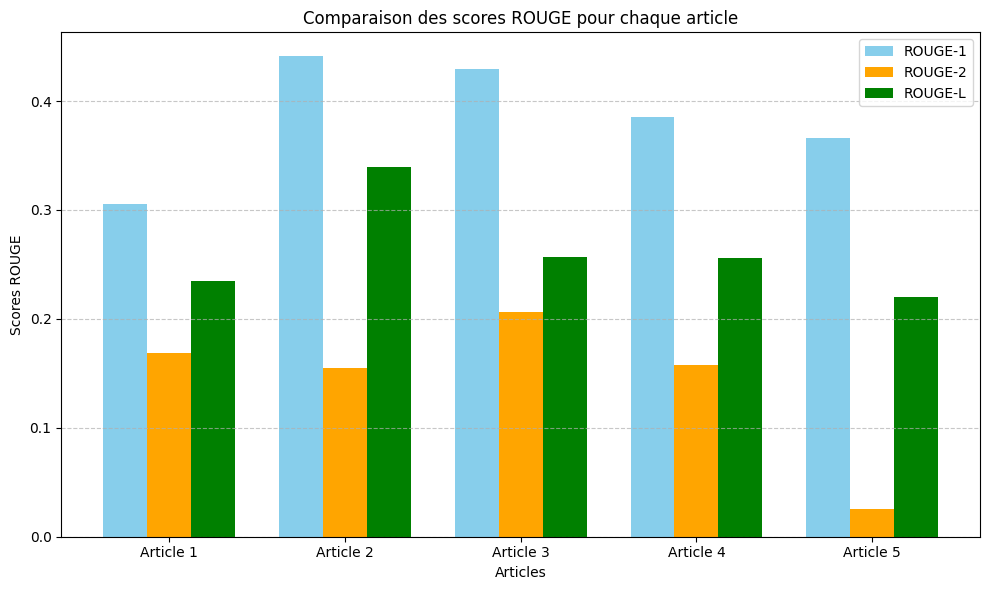

In [93]:
# Graphique 1: Comparaison des scores ROUGE pour chaque article
plt.figure(figsize=(10, 6))
x = np.arange(len(articles))
width = 0.25

plt.bar(x - width, rouge_1_scores, width, label='ROUGE-1', color='skyblue')
plt.bar(x, rouge_2_scores, width, label='ROUGE-2', color='orange')
plt.bar(x + width, rouge_l_scores, width, label='ROUGE-L', color='green')

plt.xticks(x, articles)
plt.xlabel("Articles")
plt.ylabel("Scores ROUGE")
plt.title("Comparaison des scores ROUGE pour chaque article")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("data/ROUGE_scores_comparison.png")  # Save the graph as an image
plt.show()

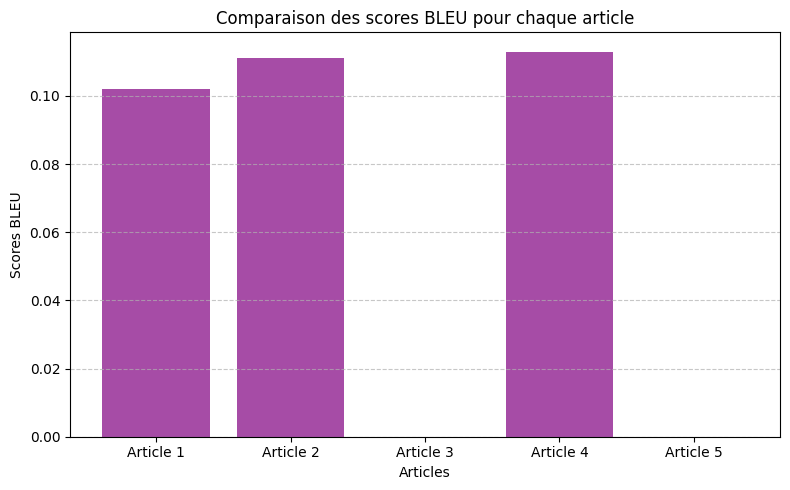

In [94]:
# Graphique 2: Comparaison des scores BLEU pour chaque article
plt.figure(figsize=(8, 5))
plt.bar(articles, bleu_scores, color='purple', alpha=0.7)
plt.xlabel("Articles")
plt.ylabel("Scores BLEU")
plt.title("Comparaison des scores BLEU pour chaque article")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("data/BLEU_scores_comparison.png")  # Save the graph as an image
plt.show()

In [95]:
import matplotlib.pyplot as plt

# Données des scores pour les articles
articles = [1, 2, 3, 4, 5]
rouge_scores = [
    {'rouge1': 0.3059, 'rouge2': 0.1687, 'rougeL': 0.2353},
    {'rouge1': 0.4407, 'rouge2': 0.1552, 'rougeL': 0.3390},
    {'rouge1': 0.4286, 'rouge2': 0.2059, 'rougeL': 0.2571},
    {'rouge1': 0.3846, 'rouge2': 0.1579, 'rougeL': 0.2564},
    {'rouge1': 0.3659, 'rouge2': 0.0250, 'rougeL': 0.2195}
]
bleu_scores = [0.1024, 0.1106, 2.118e-78, 0.1129, 4.098e-155]

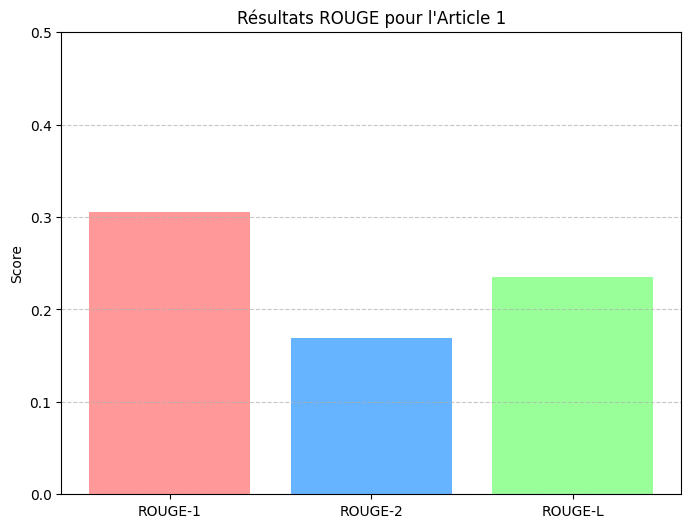

In [97]:
# Résultats pour Article 1 (ROUGE)
plt.figure(figsize=(8, 6))
plt.bar(['ROUGE-1', 'ROUGE-2', 'ROUGE-L'], 
        [rouge_scores[0]['rouge1'], rouge_scores[0]['rouge2'], rouge_scores[0]['rougeL']],
        color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Résultats ROUGE pour l'Article 1")
plt.ylabel('Score')
plt.ylim(0, 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("data/Capture_ROUGE_Article_1.png", bbox_inches='tight')
plt.show()

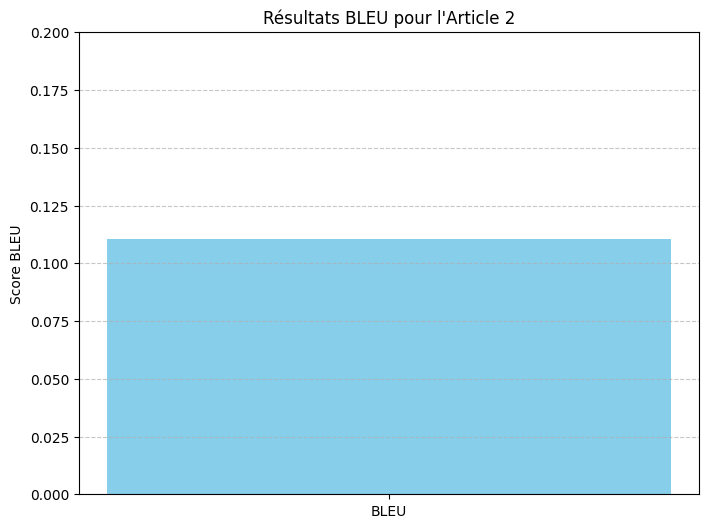

In [98]:


# Résultats pour Article 2 (BLEU)
plt.figure(figsize=(8, 6))
plt.bar(['BLEU'], [bleu_scores[1]], color='skyblue')
plt.title("Résultats BLEU pour l'Article 2")
plt.ylabel('Score BLEU')
plt.ylim(0, 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("data/Capture_BLEU_Article_2.png", bbox_inches='tight')
plt.show()

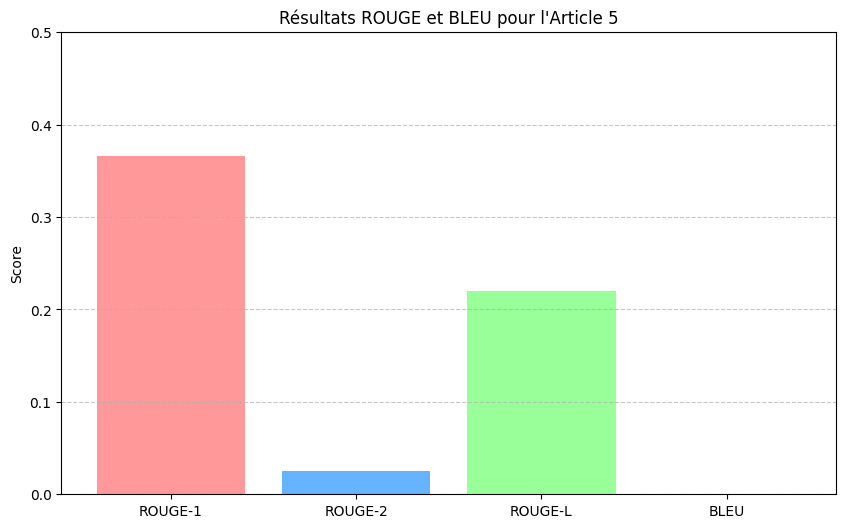

In [99]:
# Résultats pour Article 5 (ROUGE + BLEU)
plt.figure(figsize=(10, 6))
labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BLEU']
scores = [rouge_scores[4]['rouge1'], rouge_scores[4]['rouge2'], rouge_scores[4]['rougeL'], bleu_scores[4]]
plt.bar(labels, scores, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title("Résultats ROUGE et BLEU pour l'Article 5")
plt.ylabel('Score')
plt.ylim(0, 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("data/Capture_ROUGE_BLEU_Article_5.png", bbox_inches='tight')
plt.show()

### **Analyse Comparative des Résultats :**

#### **Scores ROUGE (Extraction) :**
Les scores ROUGE (Recall-Oriented Understudy for Gisting Evaluation) mesurent la qualité des résumés générés en fonction de leur capacité à se rapprocher des résumés de référence.

- **Article 1 :** 
  - **ROUGE-1 (précision = 25.5%, rappel = 38.2%, F-mesure = 30.6%)**
  - **ROUGE-2 (précision = 14%, rappel = 21.2%, F-mesure = 16.9%)**
  - **ROUGE-L (précision = 19.6%, rappel = 29.4%, F-mesure = 23.5%)**

L'extraction du résumé est plutôt faible en termes de précision pour ROUGE-2, mais le rappel est relativement meilleur. La F-mesure indique un compromis entre précision et rappel. Il semble que le modèle capture bien les mots-clés de l'article mais manque de certaines structures grammaticales spécifiques.

- **Article 2 :**
  - **ROUGE-1 (précision = 34.2%, rappel = 61.9%, F-mesure = 44.1%)**
  - **ROUGE-2 (précision = 12%, rappel = 21.9%, F-mesure = 15.2%)**
  - **ROUGE-L (précision = 26.3%, rappel = 47.6%, F-mesure = 33.9%)**

Ce résumé est plus efficace en termes de rappel, ce qui suggère que le modèle extrait plus d'informations clés. Cependant, il est faible en précision, ce qui pourrait signifier que le résumé contient des phrases non pertinentes.

- **Article 3 :**
  - **ROUGE-1 (précision = 42.9%, rappel = 42.9%, F-mesure = 42.9%)**
  - **ROUGE-2 (précision = 20.6%, rappel = 20.6%, F-mesure = 20.6%)**
  - **ROUGE-L (précision = 25.7%, rappel = 25.7%, F-mesure = 25.7%)**

Les scores sont plus équilibrés, avec une précision et un rappel égaux pour ROUGE-1, ce qui indique que le modèle a trouvé un bon compromis pour cet article.

- **Article 4 :**
  - **ROUGE-1 (précision = 41.7%, rappel = 35.7%, F-mesure = 38.4%)**
  - **ROUGE-2 (précision = 17.1%, rappel = 14.6%, F-mesure = 15.8%)**
  - **ROUGE-L (précision = 27.8%, rappel = 23.8%, F-mesure = 25.6%)**

L'extraction du résumé est encore relativement bonne en termes de ROUGE-1, mais les scores ROUGE-2 et ROUGE-L sont faibles, ce qui suggère une perte d'information lors de l'extraction.

- **Article 5 :**
  - **ROUGE-1 (précision = 37.5%, rappel = 35.7%, F-mesure = 36.6%)**
  - **ROUGE-2 (précision = 2.6%, rappel = 2.4%, F-mesure = 2.5%)**
  - **ROUGE-L (précision = 22.5%, rappel = 21.4%, F-mesure = 22%)**

Ici, la précision est plus élevée pour ROUGE-1, mais les scores de ROUGE-2 sont extrêmement faibles, indiquant que le modèle n'a pas bien capturé les bigrammes importants dans le résumé.

#### **Scores BLEU :**
Les scores BLEU mesurent la similarité entre les n-grammes dans le résumé généré et ceux du résumé de référence.

- **Scores BLEU :** Les scores BLEU sont très faibles pour la plupart des résumés, avec un score très bas pour certains articles (presque nul pour l'Article 3 et 5), ce qui suggère que le modèle ne génère pas de manière fluide des résumés similaires aux résumés de référence en termes de n-grammes.